In [2]:
import numpy as np
from hidden_others.mnist import load_mnist

In [7]:
# データの取り込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# データの形状
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
# ランダムに10データを取り出す
train_size = x_train.shape[0]
batch_size = 10

# ランダムなインデックスをチョイス => データを抽出
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]



In [9]:
batch_mask

array([37664, 55983, 11109, 54578, 12414, 56261, 10317, 51508, 33971,
       53471])

In [19]:
def corss_entropy_error(y, t):
    if np.ndim(x) == 1:
        # 次元を増やす
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * log(y + 1e-7)) / batch_size

In [20]:
a = np.array([1, 3])

In [28]:
print(a.size)
print(np.ndim(a))
a.reshape(1, a.size)

2
1


array([[1, 3]])

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# 数値微分　（中心差分）
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

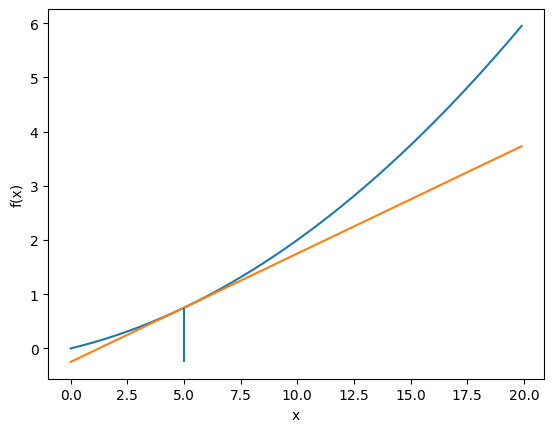

In [34]:
# y = 0.01*x**2 + 0.1*xの関数

def function_1(x):
    return 0.01*x**2 + 0.1*x

# x = ５の接戦
x_pre = 5
y = 0.01*x_pre**2 + 0.1*x_pre
coef = numerical_diff(function_1, 5)
intercept = y - coef*5
diff_y = coef*x + intercept


x = np.arange(0.0, 20.0, 0.1)
y = function(x)
plt.plot(x, y)
plt.plot(x, diff_y)
plt.xlabel('x')
plt.ylabel('f(x)')


In [25]:
numerical_diff(function_1, 5)

0.1999999999990898

In [36]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

tf = tangent_line(function_1, 5)

0.1999999999990898


In [46]:
a = np.array([1,2,3])

In [47]:
a.size

3

## 偏微分

In [48]:
# x_0**2 + x_1**2 
def function_2(x):
    return np.sum(x**2)


In [50]:
x = np.array([3.0, 4.0])
h = 1e-4
grad = np.zeros_like(x)

tmp_val = x[0]
x[0] = tmp_val + h
fxh1 = function_2(x)

x[0] = tmp_val - h
fxh2 = function_2(x)

(fxh1 - fxh2) / (2*h)

6.00000000000378

## 勾配法 

In [64]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = function_2(x)

        x[idx] = tmp_val - h
        fxh2 = function_2(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

In [65]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        # 勾配計算
        grad = numerical_gradient(f, x)
        # パラメータ更新
        x -= lr * grad
        
    return x

In [66]:
# f(x0, x1) = x0**2 + x1**2の最小値を勾配法で求める

# 関数
def function_2(x):
    return np.sum(x**2)

# 初期値
init_x = np.array([-3.0, 4.0])

gradient_descent(f=function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [62]:
grad = numerical_gradient(function_2, init_x)

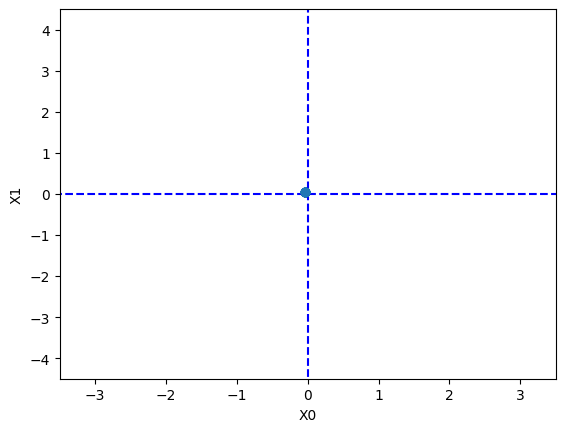

In [71]:
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [102]:
x = np.array([-3.0, 4.0]) 
x_list = []
for i in range(step_num):
    x_list.append(x)

    grad = numerical_gradient(function_2, x)
    x -= lr * grad

In [103]:
x_list

[array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686])]

In [114]:
test = []
a = np.array([0, 100])

for i in range(1):
    test.append(a.copy())
    a += 100
    test.append(a.copy())
test

[array([  0, 100]), array([100, 200])]

In [118]:
weight = np.random.randn(2,3)
weight

array([[-0.39113409,  0.16762012, -0.51439483],
       [-0.03480377,  1.89274131, -0.77686002]])

In [162]:
x = weight
h = 1e-4 # 0.0001
grad = np.zeros_like(x)

it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

In [173]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [211]:
x1 = np.array([0.6, 0.9])
g = np.array([0, 0, 1])
f = lambda w: net.loss(x2, t)
net = simpleNet()

## ２層ニューラルネットワークの実装

In [215]:
from common.functions import *
from common.gradient import numerical_gradient, gradient

In [231]:
# 二層レイヤーの構築

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        # パラメーター
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    # 予測    
    def predict(self, x):
        # 各層のパラメーター抽出
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        # 順伝播
        a1 = np.dot(x, W1)
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2)
        y = softmax(a2)
        
        return y
    
    # 損失関数
    def loss(self, x, t):
        y_pred = self.predict(x)
        
        return cross_entropy_error(y_pred, t)
    
    # 評価指標
    def accuracy(self, x, t):
        y_pred = self.predict(x)
        
        # 予測、正解ラベルに変換
        y = np.argmax(y_pred, axis=1)
        t = np.argmax(t,  axis=1)  #　one-hot vectorの時のため
        
        # accuracyの計算
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 勾配計算
    def numerical_gradient(self, x, t):
        """
        self.params[<parameter>]に微少量のhを加算・差分 
        ↓
        そのparameterでlossを算出して、勾配計算
        """
        
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    
    # githubからのコピペ (高速化のため)
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [232]:
from hidden_others.mnist import load_mnist

# データ準備
(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 10000
train_size = X_train.shape[0]
batch_size = 100
learning_rate = 0.1

# ニューラルネットの構築
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


for i in range(iters_num):
    
    # ミニバッチ取得 (range(train_size)からランダム抽出でbatch_sizeの配列)
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #　勾配
    grad = network.gradient(X_batch, t_batch) # 高速版
    
    # パラメータの更新
    for key in ['W1', 'b1', 'W2', 'b2']:
        network.params[key] -= learning_rate * grad[key]
        
    # 学習の記録
    loss = network.loss(X_batch, t_batch)
    train_loss_list.append(loss)


In [237]:
x_axis

10001

Text(0, 0.5, 'loss')

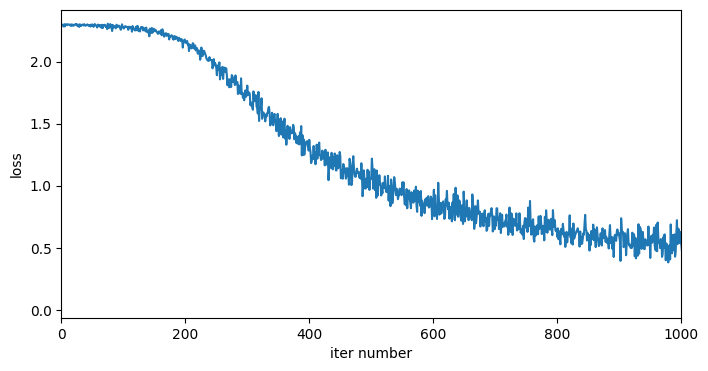

In [248]:
x_axis = range(1, len(train_loss_list)+1) 

plt.figure(figsize=(8, 4))
plt.plot(x_axis, train_loss_list)
plt.xlim(0, 1000)
plt.xlabel('iter number')
plt.ylabel('loss')

In [249]:
#　テストデータの実装

from hidden_others.mnist import load_mnist

# データ準備
(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 epochあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)


# ハイパーパラメータ
iters_num = 10000
train_size = X_train.shape[0]
batch_size = 100
learning_rate = 0.1

# ニューラルネットの構築
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


for i in range(iters_num):
    
    # ミニバッチ取得 (range(train_size)からランダム抽出でbatch_sizeの配列)
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #　勾配
    grad = network.gradient(X_batch, t_batch) # 高速版
    
    # パラメータの更新
    for key in ['W1', 'b1', 'W2', 'b2']:
        network.params[key] -= learning_rate * grad[key]
        
    # 学習の記録
    loss = network.loss(X_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, t_train)
        test_acc = network.accuracy(X_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + "," + str(test_acc))
        


train acc, test acc | 0.09863333333333334,0.0958
train acc, test acc | 0.7857,0.7902
train acc, test acc | 0.8782,0.8821
train acc, test acc | 0.89825,0.9004
train acc, test acc | 0.9075166666666666,0.9105
train acc, test acc | 0.9142,0.9167
train acc, test acc | 0.9184666666666667,0.9206
train acc, test acc | 0.9226666666666666,0.9255
train acc, test acc | 0.9256,0.9278
train acc, test acc | 0.9288333333333333,0.9324
train acc, test acc | 0.9339833333333334,0.9352
train acc, test acc | 0.9356,0.9372
train acc, test acc | 0.9371666666666667,0.9386
train acc, test acc | 0.94075,0.9418
train acc, test acc | 0.9416,0.9412
train acc, test acc | 0.9439,0.944
train acc, test acc | 0.9448666666666666,0.9444


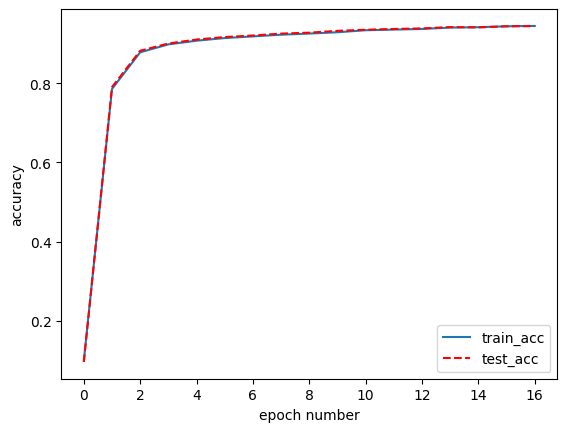

In [256]:
plt.plot(range(len(train_acc_list)), train_acc_list, label = "train_acc")
plt.plot(range(len(test_acc_list)), test_acc_list, linestyle="--", color='red', label='test_acc')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend()